In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics, datasets
import warnings
warnings.filterwarnings("ignore")

# Hyperparameter Tuning with Cross Validation

We will do a grid search over values of $C$ and $\gamma$ for an SVM with RBF kernel, and find the best model.

In [8]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
n_classes = np.unique(y).shape[0]

First we split the data into a training set and test set. We will not touch the test set till the hyperparameter tuning is done!

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=123)

Now we define our parameter grid by specifying all the possible values of $C$ and $\gamma$ we want to search over.

In [10]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_values = [1e-4, 1e-3, 0.01, 0.1, 1, 10]

For each possible setting of $\langle C, \gamma \rangle$, we will use **k-fold cross validation** and evaluate the performance of the SVM with the given hyperparameters. Use one fold as a validation set and the remaining k-1 folds as a training set. Use the F1 score (macro-average) as the evaluation metric.

Implement the function below and return the best hyperparameters.

In [11]:
from sklearn.model_selection import cross_val_score
def kfold_cv(X, n, C_values, gamma_values):
    result = 0
    for C_value in C_values:
        for gamma_value in gamma_values:
            clf = SVC(kernel = 'rbf', degree=3, C = 1, gamma=gamma_value)
            scores = cross_val_score(clf, X, y_train, cv=n, scoring='f1_macro')
            newResult = np.mean(scores)
            if newResult > result : 
                result = newResult
                C_tuned = C_value
                gamma_tuned = gamma_value
    return C_tuned, gamma_tuned

In [12]:
C_tuned, gamma_tuned = kfold_cv(X_train,10, C_values, gamma_values)
print("Best parameters are C = " + str(C_tuned) + " and gamma = " + str(gamma_tuned))

Best parameters are C = 0.001 and gamma = 0.1


Now train the SVM, using these hyperparameters, on the full training set.

In [670]:
clf = SVC(kernel = 'rbf', C = C_tuned, gamma=gamma_tuned)
clf.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

To evaluate the performance of this SVM, we can now use the test set that we previously kept locked away.

In [671]:
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_pred, y_test)
print("Accuracy: " + str(acc))
f1 = metrics.f1_score(y_pred, y_test, average='macro')
print("F1 Score: " + str(f1))

Accuracy: 0.9777777777777777
F1 Score: 0.9777530589543938


In [35]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [36]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# ROC Curves

In [37]:
def generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 500)
    class1y = np.zeros(500)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 500)
    class2y = np.ones(500)
    x = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    plt.title('Plotting 2-dimensional 2-class data')
    plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 1')
    plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    
    return x,y

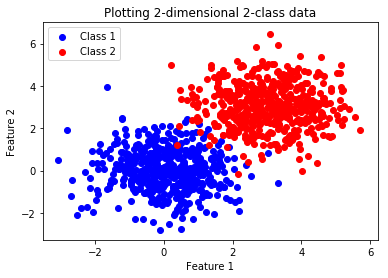

In [83]:
class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

class2Mean = [3, 3]
class2Cov = [[1, 0], [0,1]]

X,y = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The above data comprises two Gaussians with means at (0,0) and (3,3). Train an SVM on this data.

In [84]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Start by plotting the ROC Curve for the above classifier and finding the area under the curve.

In [85]:
def plot_roc_auc(y_test,y_pred):
    scores_svm = clf.decision_function(X_test)
    fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve( y_test, y_pred)
    roc_auc = metrics.auc(fpr_svm, tpr_svm)
    plt.plot(fpr_svm, tpr_svm, color='green', label='SVM')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

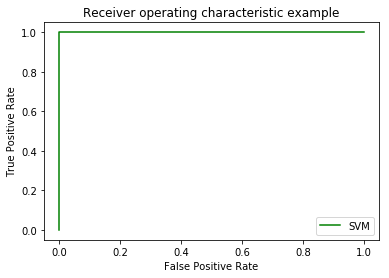

Area under curve: 1.0


In [86]:
roc_auc = plot_roc_auc(y_test,y_pred)
print("Area under curve: " + str(roc_auc))

In [78]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The ROC Curve indicates how well the classifier seperates the 'signal' from the 'background noise'. The closer the curve is to the diagonal, the worse it is at seperating two classes.

Repeat the same experiment as above, but have the means of both Gaussians coincide at (0,0). Train an SVM and plot the ROC Curve.

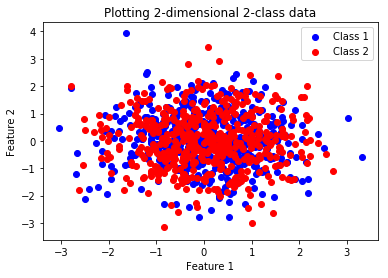

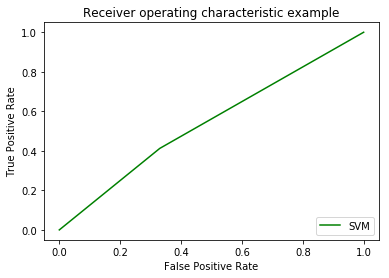

In [89]:
class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

class2Mean = [0, 0]
class2Cov = [[1, 0], [0,1]]

X,y = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
roc_auc = plot_roc_auc(y_test,y_pred)

In [90]:
print("Area under curve: " + str(roc_auc))

Area under curve: 0.5411370233209888


In [91]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


You should see the curve lie much closer to the diagonal. Of course, since the data is mixed up like this, we can't expect the classifier to discriminate between the red and blue points very well. The ROC Curve is best used when comparing the discriminating capabilities of different classifiers.

# Revisiting Multiclass Classification

In previous assignments, you used the 'encoded dataset' trick and built multiclass classifiers with Linear Regression. The same can be used for other classifiers as well. Having seen the lectures, you may recognize this as the One vs. Rest scheme.

We will now look at the **One vs. One** approach for multiclass classification.

In [598]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
n_classes = np.unique(y).shape[0]
print("Number of classes: " + str(n_classes))

Number of classes: 10


As explained in lecture, you will be creating ${k \choose 2}$ classifiers for a $k$-class problem. 

For each pair of classes $(j,k)$, pick only the datapoints that belong to those classes and run a binary classifier. Remember that the labels to be used are $+1$ and $-1$. Save the predictions of the classifiers as well as the decision function (this will be useful for breaking ties).

After collecting the results of all the pairwise matchups, we can obtain the prediction for each point by finding the class that won the most matchups. If there are ties, sum up the magnitudes of the decision function for each of the classes that had the most wins, and pick the class that has the largest total magnitude.

Refer to the slides and lecture for further explanation. In the function below, we will train the ${k \choose 2}$ classifiers and obtain the predictions.

In [663]:
from sklearn.base import clone
def onevsone(clf, n, X_train, y_train, X_test, y_test):
    y_pred = [0]*len(y_test)
    clfList = []
    classLabels = np.zeros(shape=(45,len(X_test)))
    classValues = np.zeros(shape=(45,len(X_test)))
    rowNumber = []
    columnNumber = []
    for i in range(n): 
        for j in range(i+1,n):
            dataX, dataY = getRequiredRows(i,j,X_train,y_train)
            clfij = clone(clf, safe=True)
            clfij.fit(dataX,dataY)
            clfList.append(clfij)  
            rowNumber.append(i)
            columnNumber.append(j)
    rowCount = 0
    for key,clfObj in enumerate(clfList):
        classValues[int(rowCount)] = clfObj.decision_function(X_test)
        classLabels[int(rowCount)] = [int(rowNumber[key]) if value==1 else int(columnNumber[key]) for value in clfObj.predict(X_test)]
        rowCount = rowCount + 1
    classValues  = np.transpose(classValues)
    classLabels  = np.transpose(classLabels)
    for key,row in enumerate(classLabels):
        listCount = [(0,0)]*len(np.unique(y_train))
        listValues = [(0,0)]*len(np.unique(y_train))
        for number,classLabel in enumerate(row):
            listCount[int(classLabel)] = (int(classLabel),listCount[int(classLabel)][1]+1)
            listValues[int(classLabel)] = (int(classLabel),listValues[int(classLabel)][1]+classValues[key][number])
        listCount = sorted(listCount,key=lambda x: x[1], reverse=True)
        if(listCount[0][0]!=listCount[1][0]):
            y_pred[key] = listCount[0][0]
        else:
            maxValue = listCount[0][1]
            maxSum = 0
            requiredClass = listCount[0][0]
            for key1,value1 in listValues:
                for key2,value2 in listCount:
                    if key1 == key2 and value2 == maxValue and maxSum < abs(value1):
                        requiredClass = key1
                        maxSum = abs(value1)
            y_pred[key] =  requiredClass
    return np.array(y_pred)

def getRequiredRows(i,j,X_train,y_train):
    dataX  = []
    dataY = []
    for key,value in enumerate(y_train):
        if value == i  or value == j:
            dataX.append(X_train[key])
            dataY.append(1 if y_train[key]== i else -1)
    return dataX, dataY

Let's test out the classifer. We will use a default SVM as the base (binary) classifier.

In [664]:
clf = SVC()
y_pred = onevsone(clf, n_classes, X_train, y_train, X_test, y_test)
acc = metrics.accuracy_score(y_pred, y_test)
print("Accuracy: " + str(acc))

Accuracy: 0.6037037037037037


For a sanity check, use the sklearn implementation and check if your results match. The SVC classifier provided by the library does One vs. One classification by default; `OneVsOneClassifier` is also provided by the library.

In [652]:
from sklearn.multiclass import OneVsOneClassifier
clf = OneVsOneClassifier(SVC())
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
acc = metrics.accuracy_score(y_pred, y_test)
print("Accuracy: " + str(acc))

Accuracy: 0.6037037037037037


In [653]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [654]:
print(y_pred == y_pred2)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T